In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid")
np.seterr(divide='ignore');

# A) One dimensional nonlinear equations

## Example 1)

In this activity, we will find the root of nonlinear equations using three different iterative methods. For each one, you should be thinking about cost and convergence rate.

The iterative methods below can be applied to more complex equations, but here we will use a simple nonlinear equation of the form:

$$f(x) = e^x - 2 $$

The exact root that satisfies $f(x) = 0$ is $x = ln(2) \approx 0.693147$. We can take a look at the function in the interval $[-2,2]$.


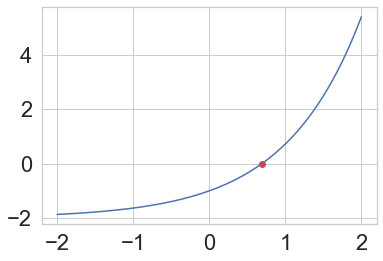

In [2]:
a0 = -2
b0 = 2

x = np.linspace(a0, b0)

def f(x):
    return np.exp(x) - 2

def df(x):
    return np.exp(x)


xtrue = np.log(2)

plt.plot(x, f(x))
plt.plot(xtrue,0,'ro')

### a) Bisection Method

#### First we will run the iterative process for a few iterations:

In [3]:
a = a0
b = b0
interval = np.abs(a - b)   
errors = []

fa = f(a)

for i in range(12):
    m = (a+b)/2
    fm = f(m)   
    if  np.sign(fa) == np.sign(fm):
        a = m 
        fa = fm # this line is not really needed, 
        # since we only need the sign of a, and sign of a is the same as sign of m
    else:
        b = m
    interval = np.abs(a - b)    
    errors.append(interval)        
    print("%10g \t %10g \t %12g" % (a, b, interval))
    
print('exact root is = ', np.log(2))

         0 	          2 	            2
         0 	          1 	            1
       0.5 	          1 	          0.5
       0.5 	       0.75 	         0.25
     0.625 	       0.75 	        0.125
    0.6875 	       0.75 	       0.0625
    0.6875 	    0.71875 	      0.03125
    0.6875 	   0.703125 	     0.015625
    0.6875 	   0.695312 	    0.0078125
  0.691406 	   0.695312 	   0.00390625
  0.691406 	   0.693359 	   0.00195312
  0.692383 	   0.693359 	  0.000976562
exact root is =  0.6931471805599453


#### Now we will add a stopping criteria. 

Since we know the interval gets divided by two every iteration, how many iterations do we need to perform to achieve the tolerance $2^{-k}$?

Note that only one function evaluation is needed per iteration!

We can also verify the linear convergence, with C = 0.5

In [4]:
a = a0
b = b0
interval = np.abs(a - b)   
errors = [interval]

fa = f(a)
count = 0

while count < 30 and interval > 2**(-4):
    m = (a+b)/2
    fm = f(m)   
    if  fa*fm > 0:
        a = m 
    else:
        b = m
    interval = np.abs(a - b)    
    errors.append(interval)        
    print("%10g \t %10g \t %12g %12g" % (a, b, interval, interval/errors[-2]))
    
print('exact root is = ', np.log(2))

         0 	          2 	            2          0.5
         0 	          1 	            1          0.5
       0.5 	          1 	          0.5          0.5
       0.5 	       0.75 	         0.25          0.5
     0.625 	       0.75 	        0.125          0.5
    0.6875 	       0.75 	       0.0625          0.5
exact root is =  0.6931471805599453


Text(0.5, 0, 'Iterations')

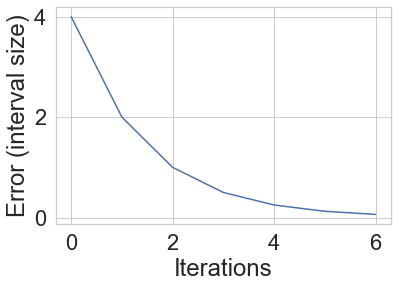

In [5]:
plt.plot(errors)
plt.ylabel('Error (interval size)')
plt.xlabel('Iterations')

What happens if you have multiple roots inside the interval? Bisection method will converge to one of the roots. Try to run the code snippet above using the function 

$$ f(x) = 0.5 x^2 - 2 $$

Change the interval, and observe what happens.

### b) Newton's Method

In [8]:
x0 = 2
r = 2

In [9]:
x = x0
count = 0
tol = 1e-6
err = 1
errors = [err]

while count < 30 and err > tol:
    x = x - f(x)/df(x)
    err = abs(x-xtrue)
    errors.append(err)
    print('%10g \t%10g \t %.16e %.4g' % (x, f(x), err, errors[-1]/(errors[-2]**r) ))

   1.27067 	   1.56324 	 5.7752338591328012e-01 0.5775
  0.831957 	  0.297812 	 1.3881012318002328e-01 0.4162
  0.702351 	 0.0184918 	 9.2034034572215928e-03 0.4776
  0.693189 	8.44452e-05 	 4.2221690566890402e-05 0.4985
  0.693147 	1.78265e-09 	 8.9132301539507353e-10 0.5


### c) Secant Method

In [10]:
x0 = 2
x1 = 8
r = 2
#r = 1.618

In [11]:
# Need two initial guesses
xbefore = x0
x = x1
count = 0
tol = 1e-8
err = 1
errors = [err]

while count < 30 and err > tol:

    df_approx = (f(x)-f(xbefore))/(x-xbefore)
    xbefore = x
    x = x - f(x)/df_approx
    err = abs(x-xtrue)
    errors.append(err)
    print('%10g \t%10g \t %.16e %.4g' % (x, f(x), err, errors[-1]/errors[-2]**r ))

   1.98913 	   5.30914 	 1.2959789041737508e+00 1.296
   1.97839 	   5.23112 	 1.2852471085772197e+00 0.7652
   1.25885 	   1.52137 	 5.6570418067033190e-01 0.3425
  0.963766 	  0.621549 	 2.7061833731723317e-01 0.8456
  0.759937 	   0.13814 	 6.6789331877922575e-02 0.912
   0.70169 	 0.0171582 	 8.5425082065405666e-03 1.915
  0.693429 	0.000563492 	 2.8170616606482124e-04 3.86
  0.693148 	2.40294e-06 	 1.2014692549744410e-06 15.14
  0.693147 	3.38445e-10 	 1.6922274692632300e-10 117.2


### d) Using scipy functions for root finding:

In [12]:
import scipy.optimize as opt

In [13]:
opt.root_scalar(f,bracket=[-2, 3],method='bisect')

      converged: True
           flag: 'converged'
 function_calls: 44
     iterations: 42
           root: 0.6931471805607998

In [14]:
opt.root_scalar(f,bracket=[-2, 3])

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.6931471805599405

In [15]:
opt.root_scalar(f,x0=3, fprime=df, method='newton')

      converged: True
           flag: 'converged'
 function_calls: 14
     iterations: 7
           root: 0.6931471805599454

In [16]:
opt.root_scalar(f,x0=3,x1=4, method='secant')

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 0.6931471805599454

## Example 2)

### a) Graphical convergence of Newton's Method

Let's take a look at this other function

$$f(x) = x^3 - x + 1 $$

And we plot it in the interval $[-4,4]$.


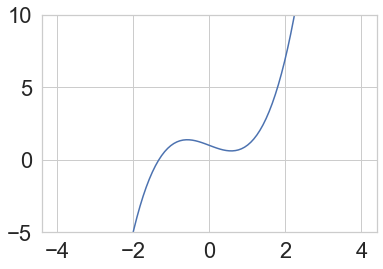

In [17]:
def f(x):
    return x**3 - x +1

def df(x):
    return 3*x**2 - 1

xmesh = np.linspace(-4, 4, 100)
plt.ylim([-5, 10])
plt.plot(xmesh, f(xmesh))

xexact = -1.324717957244746


In [18]:
guesses = [-.9]
guesses = [1.5]

Evaluate this cell many times in-place (using Ctrl-Enter)

1.0


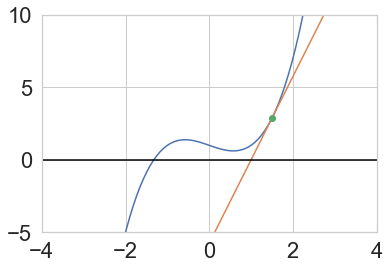

In [19]:
x = guesses[-1] # grab last guess

slope = df(x)

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + slope*(xmesh-x))
plt.plot(x, f(x), "o")
plt.xlim([-4, 4])
plt.ylim([-5, 10])
plt.axhline(0, color="black")

# Compute approximate root
xnew = x - f(x) / slope
guesses.append(xnew)
print(xnew)


In [20]:
f(xnew)

1.0

In [21]:
print(guesses)

[1.5, 1.0]


In [22]:
error = abs(np.array(guesses)-xexact)

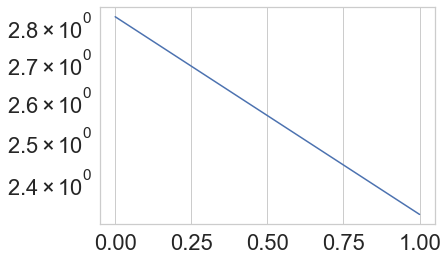

In [23]:
plt.semilogy(error)

### b) Graphical convergence of Secant Method

In [24]:
guesses = [2, 1.7]

Evaluate this cell many times in-place (using Ctrl-Enter)

1.2465016146393972


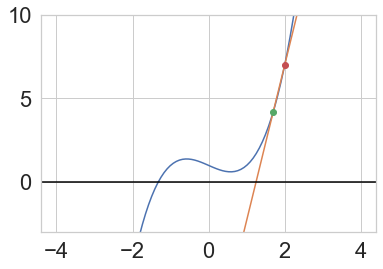

In [25]:
# grab last two guesses
x = guesses[-1]
xbefore = guesses[-2]

slope = (f(x)-f(xbefore))/(x-xbefore)

# plot approximate function
plt.plot(xmesh, f(xmesh))
plt.plot(xmesh, f(x) + slope*(xmesh-x))
plt.plot(x, f(x), "o")
plt.plot(xbefore, f(xbefore), "o")
plt.ylim([-4, 4])
plt.ylim([-3, 10])
plt.axhline(0, color="black")

# Compute approximate root
xnew = x - f(x) / slope
guesses.append(xnew)
print(xnew)

# B) N-Dimensional Nonlinear Equations

We will solve the following system of nonlinear equations:

$$ x + 2y = 2 $$

$$ x^2 + 4y^2 = 4 $$

We will define our vector valued function ${\bf f}$, which takes a vector as argument, with the components $x$ and $y$. We are trying to find the numerical (approximated) solution that safisfies:

$${\bf f} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}
          = \begin{bmatrix} x + 2y - 2 \\ x^2 + 4y^2 - 4 \end{bmatrix}
          = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$
          
and the exact solution is $[0,1]$

We will also define the gradient of ${\bf f}$, $\nabla{\bf f}$, which we call the Jacobian.

### Newton's method

In [26]:
def f(xvec):
    x, y = xvec
    return np.array([
        x + 2*y -2,
        x**2 + 4*y**2 - 4
        ])

def Jf(xvec):
    x, y = xvec
    return np.array([
        [1, 2],
        [2*x, 8*y]
        ])

Pick an initial guess.

In [27]:
x = np.array([1, 2])

Now implement Newton's method.

In [28]:
for i in range(10):
    s = la.solve(Jf(x), -f(x))
    x = x + s
x

array([1.50295992e-16, 1.00000000e+00])

Check if that's really a solution:

In [29]:
f(x)


array([0., 0.])

The cost is $O(n^3)$ per iteration, since the Jacobian changes every iteration. But how fast is the convergence?

In [30]:
r = 2

xtrue = np.array([0, 1])
x = np.array([1, 2])
errors = [la.norm(x)]

while errors[-1] > 1e-12:
    A = Jf(x)
    s = la.solve(A, f(x))
    x = x - s
    err = la.norm(x-xtrue)
    errors.append(err)
    print(' %.16e \t %.4g' % (err, errors[-1]/errors[-2]**r ))

 9.3169499062491201e-01 	 0.1863
 2.1174886150566186e-01 	 0.2439
 1.6858985788667225e-02 	 0.376
 1.2522123592245921e-04 	 0.4406
 7.0116836915221782e-09 	 0.4472
 1.5029599174076677e-16 	 3.057


### Finite Difference

Suppose you don't know how to calculate the Jacobian. You can use Forward Finite Difference to approximate the derivatives! 

In [31]:
def fd(xvec,dx):
    fval = f(xvec)
    J = np.zeros((fval.shape[0],xvec.shape[0]))
    for j in range(len(xvec)):
        xvec[j] = xvec[j] + dx
        dfd = f(xvec)-fval
        for i in range(len(fval)):
            J[i,j] = dfd[i]/dx
        xvec[j] = xvec[j] - dx
    return J

In [32]:
x = np.array([4, 2],dtype=float)
fd(x,0.0001)

array([[ 1.    ,  2.    ],
       [ 8.0001, 16.0004]])

In [33]:
Jf(np.array([4,2]))

array([[ 1,  2],
       [ 8, 16]])

In [34]:
x = np.array([1., 2])
for i in range(10):
    s = la.solve(fd(x,0.0001), -f(x))   
    x = x + s
    print(x)
x

[-0.83340278  1.41670139]
[-0.18942711  1.09471356]
[-0.01508766  1.00754383]
[-1.12495848e-04  1.00005625e+00]
[-9.13879733e-09  1.00000000e+00]
[-2.28607117e-13  1.00000000e+00]
[9.31075219e-17 1.00000000e+00]
[9.31058616e-17 1.00000000e+00]
[9.31058616e-17 1.00000000e+00]
[9.31058616e-17 1.00000000e+00]


array([9.31058616e-17, 1.00000000e+00])

# C) Inverse Kinematics

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import fsolve

The helper functions below will be used for plotting purposes:

In [ ]:
# helper functions for plotting

def endpt(pt, ang, length):
    x, y = pt
    endy = y + length * np.sin(ang)
    endx = x + length * np.cos(ang)
    return endx, endy

def plotarms(x,y,beta,a,b,sol):

    fig = plt.figure(figsize = (12,6))

    startx, starty = (0,0)
    endx, endy = endpt((startx,starty),sol[0],a)
    plt.plot([startx, endx], [starty, endy], '-r', linewidth=4)
    plt.plot([startx], [starty], 'ko',markersize=12)
    plt.plot([endx], [endy], 'ko',markersize=12)
    plt.text(startx-0.3, starty+0.3, r'$A$', fontsize=20)
    plt.text(endx, endy+0.3, r'$B$', fontsize=20)
    plt.text(startx+0.8, starty, r'$\theta_1$', fontsize=20)
    plt.plot([endx, x], [endy, y], '-g', linewidth=4)
    plt.plot([x], [y], 'ko',markersize=12)
    plt.text(x, y-1, r'$C$', fontsize=20)
    plt.text(endx-0.5, endy-1.2, r'$\theta_2$', fontsize=20)
    plt.text(x-0.2, y+0.5, r'$\theta_3$', fontsize=20)
    plt.plot([x, x+2], [y, y], '--k')
    plt.plot([x, x+2*np.cos(beta)], [y, y+2*np.sin(beta)], '--k')
    plt.text(x+np.cos(beta), y, r'$\beta$', fontsize=20)

    plt.xlim(-1,a+b)
    plt.ylim(-1,0.8*a)
    plt.show()


You have derived the equations needed to solve this inverse kinematics problem. Below is the implementation of the function and its derivative (the Jacobian):

In [ ]:
def func(xvec, *args):   
    #xvec = (theta1, theta2, theta3)   
    a,b,x,y,beta  = args
    
    c      = np.sqrt(x**2 + y**2)    
    alpha2 = np.arcsin(y/c)
    
    f = np.zeros(3)
    
    f[0] = a**2 + b**2 - 2*a*b*np.cos(xvec[1]) - c**2    
    f[1] = a**2 + c**2 - 2*a*c*np.cos(xvec[0] - alpha2) - b**2
    f[2] = xvec[0] + xvec[1]- xvec[2] - beta
    
    return f

def dfunc(xvec, *args):
    # A function to compute the Jacobian of func with derivatives across the rows.      
    #xvec = (theta1, theta2, theta3)
    a,b,x,y,beta  = args
      
    c      = np.sqrt(x**2 + y**2)    
    alpha2 = np.arcsin(y/c)
    
    df = np.zeros((3,3))
    
    df[0,0] = 0
    df[0,1] = 2*a*b*np.sin(xvec[1])   
    df[0,2] = 0
    
    df[1,0] = 2*a*c*np.sin(xvec[0] - alpha2) 
    df[1,1] = 0  
    df[1,2] = 0

    df[2,0] = 1
    df[2,1] = 1 
    df[2,2] = -1
    
    return df

**Given** the desire position of the robotic hand:

In [ ]:
x = 8
y = 2
beta = np.pi/4

c = np.sqrt(x**2+y**2)

and variables corresponding to the geometry of the robotic arm:

In [ ]:
# Given arm lengths:
a = 10
b = 5

You can **find** the angles for the joints, or the angles $\theta_1, \theta_2, \theta_3$. Since the solution of nonlinear system of equations requires an iterative process, we need to provide initial values:

In [ ]:
# Set initial guess
theta1guess = np.pi/2
theta2guess = np.arccos( (a**2+b**2-c**2)/(2*a*b) )
theta3guess = theta1guess+theta2guess
x0 = [theta1guess,theta2guess,theta3guess]
print(np.degrees(x0))

We will use the python function:
    
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html  ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) 

to solve this nonlinear problem. 

The `fsolve` function requires `func`, which is the function that evaluates ${\bf f(x)}$, and the initial guess `x0`.

```python
scipy.optimize.fsolve(func, x0, args=(), fprime=None)
```

You can also set `args` to pass additional parameters. If you only provide `func`, `fsolve` will approximate the Jacobian. However, you can provide a function to compute the Jacobian as `fprime`.

We will create a variable to store the "optional" parameters to be used as arguments of the "fsolve" function:

In [ ]:
# Create tuple with optional problem parameters
const = (a,b,x,y,beta)

In [ ]:
# Solve for the unknowns using fsolve (only function provided)
# sol = [theta1, theta2, theta3]
(sol,info,ier,msg) = fsolve(func, x0, const, full_output=True)
print(np.degrees(sol))
print('number of function evaluations = ', info['nfev'])
plotarms(x,y,beta,a,b,sol)

In [ ]:
# Solve for the unknowns using fsolve  (function and jacobian provided)
# sol = [theta1, theta2, theta3]
(sol,info,ier,msg) = fsolve(func, x0, args=const, full_output=True, fprime = dfunc)
print(np.degrees(sol))
print('number of function evaluations = ', info['nfev'])
print('number of jacobian evaluations = ', info['njev'])
plotarms(x,y,beta,a,b,sol)

Note that both methods yield the same result, however, when the jacobian is provided, the method requires less function evaluations. 

You can also obtain the solution implementing your own Newton method:

In [ ]:
#Implementing Newton Method
x = np.random.uniform(low=np.pi/10, high=np.pi/2, size=(3,))
er = 1
count = 0
while er > 1e-9 and count < 100:
    count += 1
    h = la.solve(dfunc(x,*const), func(x,*const))
    x = x - h
    er = la.norm(h)
print('number of function evaluations = ', count)
print(np.degrees(x))